In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import causallearn

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io
import os

In [8]:
# Define a list of potential marker styles
markers = ['o', 's', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'D', 'd', '|', '_']
colors = ['b',  'k', 'gray','brown','navy','teal','olive','orange','purple','g', 'r', 'c', 'm', 'y',] 

## Specify the experimental data 

In [9]:
path = "../data/fixed_rate/64B-4096"

### Read the PCM statistics

In [12]:
core = pd.read_csv(path+"/"+ "bridge-pcm_old.csv",  header=[0,1])
print(core.describe())

         Socket 0                                                              \
             EXEC         IPC        FREQ       AFREQ      L3MISS      L2MISS   
count  583.000000  583.000000  583.000000  583.000000  583.000000  583.000000   
mean     0.329897    1.762213    0.184957    1.187393    0.075420  169.446844   
std      0.001655    0.040522    0.006732    0.005049    0.106738    2.521189   
min      0.320000    1.480000    0.180000    1.160000    0.030000  128.410000   
25%      0.330000    1.770000    0.180000    1.190000    0.030000  169.075000   
50%      0.330000    1.770000    0.180000    1.190000    0.040000  170.090000   
75%      0.330000    1.780000    0.190000    1.190000    0.050000  170.430000   
max      0.350000    1.870000    0.220000    1.190000    0.630000  171.020000   

                                             ... Core3 (Socket 0)              \
       L3HIT       L2HIT  L3MPI       L2MPI  ...           C7res%        TEMP   
count  583.0  583.000000  5

In [13]:
core.columns

MultiIndex([(              'System',                'Date'),
            (              'System',                'Time'),
            (            'Socket 0',                'EXEC'),
            (            'Socket 0',                 'IPC'),
            (            'Socket 0',                'FREQ'),
            (            'Socket 0',               'AFREQ'),
            (            'Socket 0',              'L3MISS'),
            (            'Socket 0',              'L2MISS'),
            (            'Socket 0',               'L3HIT'),
            (            'Socket 0',               'L2HIT'),
            (            'Socket 0',               'L3MPI'),
            (            'Socket 0',               'L2MPI'),
            (            'Socket 0',               'L3OCC'),
            (            'Socket 0',                'READ'),
            (            'Socket 0',               'WRITE'),
            (            'Socket 0',               'LOCAL'),
            (           

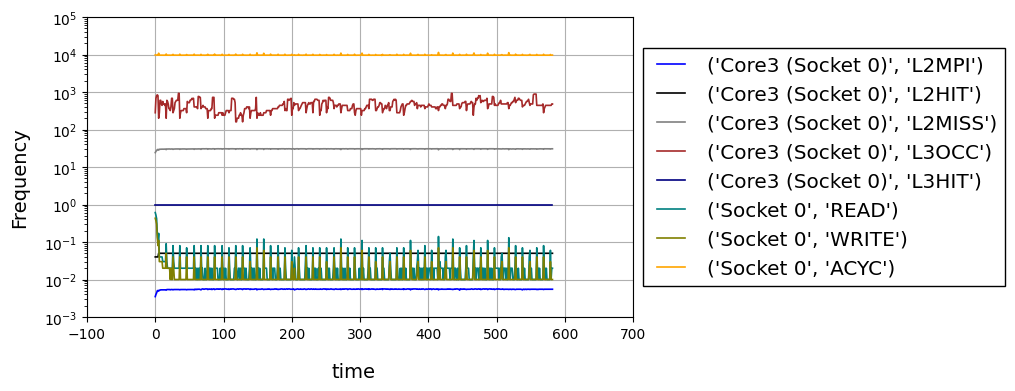

In [14]:
import matplotlib.pyplot as plt

frequency_data = [
    core[('Core3 (Socket 0)', 'L2MPI')],
    core[('Core3 (Socket 0)', 'L2HIT')],
    core[('Core3 (Socket 0)', 'L2MISS')],
    core[('Core3 (Socket 0)', 'L3OCC')],
    core[('Core3 (Socket 0)', 'L3HIT')],
    core[('Socket 0', 'READ')],
    core[('Socket 0', 'WRITE')],
    core[('Socket 0', 'ACYC')]
]

fig, ax = plt.subplots(facecolor='white', figsize=(7,4))
plt.style.use('classic')
ax.set_yscale('log')

for i in range(8):
    plt.plot( frequency_data[i][0:600], label=frequency_data[i].name, color=colors[i],linewidth = 1.2)


plt.legend(loc="lower right", fontsize=8)
fig.text(0.5, 0.0, 'time', size='14', ha='center')
fig.text(0.01, 0.5, 'Frequency', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()


In [15]:
columns_filtered = [col for col in core.columns if "Core3" in col[0]] + [('Socket 0', 'READ'), ('Socket 0', 'WRITE')]
core_filtered = core[columns_filtered]
core_filtered.columns = [col[1] for col in columns_filtered]

# Drop TEMP, INST, ACYC, TIME(ticks)
core_filtered.drop(columns=["TEMP", "INST", "ACYC", "TIME(ticks)"], inplace=True)

C:\Users\Qiong\AppData\Local\Temp\ipykernel_7376\1514460275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_filtered.drop(columns=["TEMP", "INST", "ACYC", "TIME(ticks)"], inplace=True)


### Read the PCM-Memory statistics

In [16]:
mem = pd.read_csv(path+"/"+ "pcm-memory.csv",  header=[0,1])

print("Data dimension: ", mem.shape)
print("Data columns: ", mem.columns)

Data dimension:  (583, 29)
Data columns:  MultiIndex([('Unnamed: 0_level_0',             'Date'),
            ('Unnamed: 1_level_0',             'Time'),
            (              'SKT0',          'Ch0Read'),
            (              'SKT0',         'Ch0Write'),
            (              'SKT0',          'Ch1Read'),
            (              'SKT0',         'Ch1Write'),
            (              'SKT0',          'Ch2Read'),
            (              'SKT0',         'Ch2Write'),
            (              'SKT0',          'Ch3Read'),
            (              'SKT0',         'Ch3Write'),
            (              'SKT0',  'Mem Read (MB/s)'),
            (              'SKT0', 'Mem Write (MB/s)'),
            (              'SKT0',   'P. Write (T/s)'),
            (              'SKT0',    'Memory (MB/s)'),
            (              'SKT1',          'Ch0Read'),
            (              'SKT1',         'Ch0Write'),
            (              'SKT1',          'Ch1Read'),
      

#### Visualizing the memory statistics of Socket 0

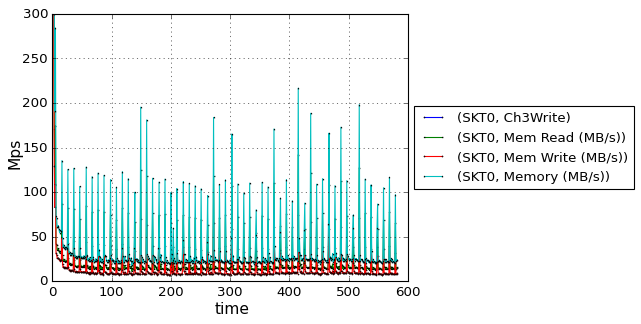

In [17]:
# Plot each column with a random marker
ax = None
fig, ax = plt.subplots(facecolor='white', figsize=(8,4))
plt.style.use('classic')


for col in mem.columns[9::]:
    if "SKT0" in col and not 'P. Write (T/s)' in col:
        ax = mem[col].plot(marker=np.random.choice(markers), markersize=1,ax=ax)
 

fig.text(0.35, 0.0, 'time', size='14', ha='center')
fig.text(0, 0.5, 'Mps', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)
plt.ylim(0,300)
# Adjust legend and layout
plt.tight_layout()
plt.show()

In [18]:
columns_filtered = [col for col in mem.columns if "SKT0" in col[0]] 
mem_filtered = mem[columns_filtered]
mem_filtered.columns = [col[1] for col in columns_filtered]
mem_filtered.columns

Index(['Ch0Read', 'Ch0Write', 'Ch1Read', 'Ch1Write', 'Ch2Read', 'Ch2Write',
       'Ch3Read', 'Ch3Write', 'Mem Read (MB/s)', 'Mem Write (MB/s)',
       'P. Write (T/s)', 'Memory (MB/s)'],
      dtype='object')

### Read the PCM-pcie statistics

In [19]:
pcie = pd.read_csv(path+"/"+ "pcm-pcie.csv", )
print("Data description: ", pcie.describe())

Data description:           Skt  PCIRdCur   RFO   CRd   DRd  ItoM   PRd   WiL
count   1742      1742  1742  1742  1742  1742  1742  1742
unique     3      1159  1108  1157  1159   572   461  1047
top        0  PCIRdCur   RFO   CRd   DRd  ItoM   PRd   WiL
freq     581       580   580   580   580   580   580   580


In [20]:
pcie.columns

Index(['Skt', 'PCIRdCur', 'RFO', 'CRd', 'DRd', 'ItoM', 'PRd', 'WiL'], dtype='object')

In [21]:
pcie.head(10)

,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
0,0,9084656,8740228,566566,90238540,2489872,0,652554
1,1,13410250,555044,3384192,55998894,0,157486,614432
2,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
3,0,11070710,9722958,343252,99450134,2493120,0,720188
4,1,13300476,546784,3672942,55408584,0,156310,614530
5,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
6,0,12681984,10530478,377258,106606038,2428412,0,760732
7,1,13411930,556066,3536652,55693022,0,156310,617736
8,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
9,0,15586536,11339160,695702,113622670,2271304,0,903434


In [22]:
# Separate the rows into timestamps and values
skt_1 = pcie[0::3]
skt_2 = pcie[1::3]

skt_1 = skt_1.drop(columns="Skt")
skt_2 = skt_2.drop(columns="Skt")

skt_1 = skt_1.add_prefix("skt0-")
skt_2= skt_2.add_prefix("skt1-")

print("Socket 0 pcie statistics: ", skt_1.describe())
print("Socket 0 sample header: ", skt_1.head())

Socket 0 pcie statistics:         skt0-PCIRdCur  skt0-RFO skt0-CRd  skt0-DRd skt0-ItoM skt0-PRd skt0-WiL
count            581       581      581       581       581      581      581
unique           579       576      577       581       569       42      523
top         16868026  11786264   350616  90238540   2200114        0   964334
freq               2         2        2         1         2      214        3
Socket 0 sample header:     skt0-PCIRdCur  skt0-RFO skt0-CRd   skt0-DRd skt0-ItoM skt0-PRd skt0-WiL
0        9084656   8740228   566566   90238540   2489872        0   652554
3       11070710   9722958   343252   99450134   2493120        0   720188
6       12681984  10530478   377258  106606038   2428412        0   760732
9       15586536  11339160   695702  113622670   2271304        0   903434
12      16128630  11339286   374332  115922576   2183930        0   916664


In [23]:
skt_1 = skt_1.reset_index(drop=True).dropna().astype(float)
print(skt_1.describe())
print(skt_1)

       skt0-PCIRdCur      skt0-RFO      skt0-CRd      skt0-DRd     skt0-ItoM  \
count   5.810000e+02  5.810000e+02  5.810000e+02  5.810000e+02  5.810000e+02   
mean    1.684049e+07  1.185790e+07  6.706634e+05  1.190216e+08  2.272224e+06   
std     6.477705e+05  3.142231e+05  1.176029e+06  3.036809e+06  6.024903e+04   
min     9.084656e+06  8.740228e+06  1.959580e+05  9.023854e+07  1.836114e+06   
25%     1.670668e+07  1.173479e+07  2.890440e+05  1.181023e+08  2.241722e+06   
50%     1.688000e+07  1.187838e+07  3.342220e+05  1.192589e+08  2.268294e+06   
75%     1.718318e+07  1.202993e+07  5.113780e+05  1.208209e+08  2.311078e+06   
max     1.754995e+07  1.245135e+07  1.124431e+07  1.231613e+08  2.493120e+06   

          skt0-PRd       skt0-WiL  
count   581.000000     581.000000  
mean    148.674699  955369.325301  
std     327.721769   31884.244398  
min       0.000000  652554.000000  
25%       0.000000  953624.000000  
50%     140.000000  961534.000000  
75%     196.000000  967876.

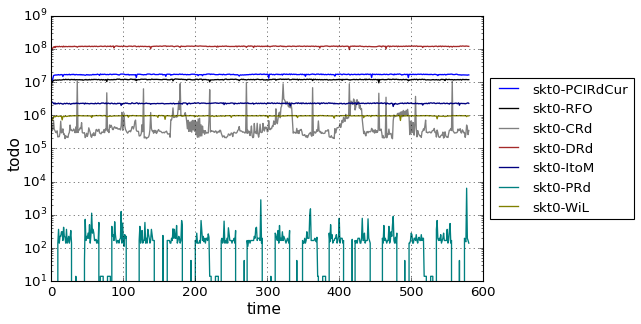

In [24]:
fig, ax = plt.subplots(facecolor='white', figsize=(8,4))
plt.style.use('classic')

i=0
for column_name in skt_1.columns:
    plt.plot(skt_1[column_name], label=column_name, color=colors[i],linewidth = 1.2)
    i=i+1
ax.set_yscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.text(0.4, 0.0, 'time', size='14', ha='center')
fig.text(0, 0.5, 'todo', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)

# Adjust legend and layout
plt.tight_layout()
plt.show()

### Read the end-to-end KPIs, i.e., input rate, output rate, and latency
#### Read the input rate (in Gbps)

In [25]:
tx = pd.read_csv(path+"/tx_stats.csv")["MbitWithFraming"].reset_index(drop=True)
print("Data description:", tx.describe())

Data description: count     586.000000
mean     6879.428781
std       291.934741
min      1465.751759
25%      6884.126951
50%      6928.750070
75%      6946.548248
max      6968.203574
Name: MbitWithFraming, dtype: float64


#### Read the output rate, i.e., the throughput

In [26]:
rx = pd.read_csv(path+"/rx_stats.csv")["MbitWithFraming"].reset_index(drop=True)
print("Data description: ", rx.describe())

Data description:  count     586.000000
mean     6860.124641
std       445.057354
min       135.728801
25%      6883.938606
50%      6928.306891
75%      6944.859678
max      6968.310144
Name: MbitWithFraming, dtype: float64


In [27]:
# Rename the column names to distinguish TX and RX statistics
tx.name = "Input_rate"
rx.name = "Output_rate"

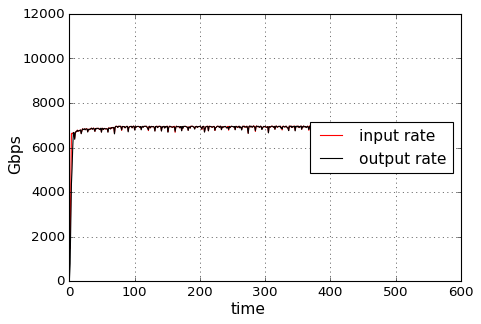

In [28]:
#plt.xlim(50,100)
fig, ax = plt.subplots(facecolor='white', figsize=(6,4))
plt.style.use('classic')


#plt.plot(rx)
plt.ylim(0, 12000) 
plt.plot(tx,label='input rate',color='r')
plt.plot(rx,label='output rate',color='k')

fig.text(0.5, 0.0, 'time', size='14', ha='center')
fig.text(0, 0.5, 'Gbps', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')
plt.legend(loc='center right',fontsize=14)

# Adjust legend and layout
plt.tight_layout()
plt.savefig('..\\64B-4096.png')
plt.show()